In [1]:
import numpy as np 
import numba 

In [4]:
@numba.jit(nopython=True, cache=True)
def nb_sample_cdf(cdf):
    """ Generate sample from given (discrete) cdf """
    rand = np.random.random() 
    for i in range(len(cdf)):
        if rand < cdf[i]:
            return i + 1

# Specific functions
@numba.jit(nopython=True, cache=True)
def nb_truncated_zipf(alpha, N):
    """ Compute the cumulative distribution function for the truncated
        discrete zeta distribution (Zipf's law)
    """
    x = np.arange(1, N+1, dtype=np.float64)
    weights = x ** -alpha
    weights /= np.sum(weights)
    cdf = np.cumsum(weights)
    return cdf

In [19]:
@numba.jit(nopython=True, cache=True)
def nb_sample_powlaw(alpha, xmin=1):
    _x = (xmin-0.5)*(1-np.random.random())**(-1/(alpha-1)) + 0.5 
    return np.floor(_x)

In [20]:
alpha = 1.1
N = 1024
cdf = nb_truncated_zipf(alpha, N)

In [29]:
nsamps = 1000000
zipf_samps = [nb_sample_cdf(cdf) for _ in range(nsamps)]
appr_samps = [nb_sample_powlaw(alpha) for _ in range(nsamps)]

/home/johannes/projects/population_dynamics/code/population/lib/python3.8/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


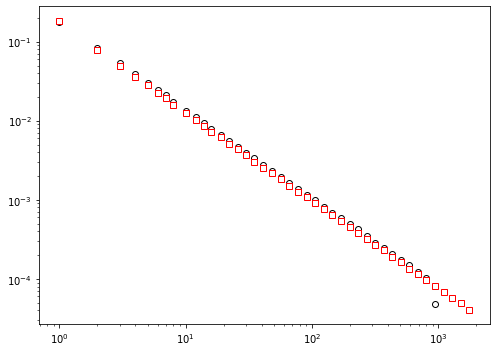

In [31]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1,1, figsize=(7,5), tight_layout=True)
bins = np.logspace(0, np.log10(2*N), 50, dtype=int)
zipf_hist, _ = np.histogram(zipf_samps, bins=bins, density=True)
appr_hist, _ = np.histogram(appr_samps, bins=bins, density=True)
ax.loglog(bins[:-1], zipf_hist, color='k', marker='o', mfc='white', linestyle='none')
ax.loglog(bins[:-1], appr_hist, color='r', marker='s', mfc='white', linestyle='none')